This is what is interpolated in Hubble.py
Same definitions are used in Hubble.hpp that you can call from C++. 

See Boltzmann.cpp for examples in C++.


In [1]:

from CosmoFuncs.Hubble import *

import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=14
plt.rcParams['mathtext.fontset']='stixsans'

In [2]:
eos2020=np.loadtxt('CosmoFuncs/src/data/eos2020.dat')

<IPython.core.display.Javascript object>


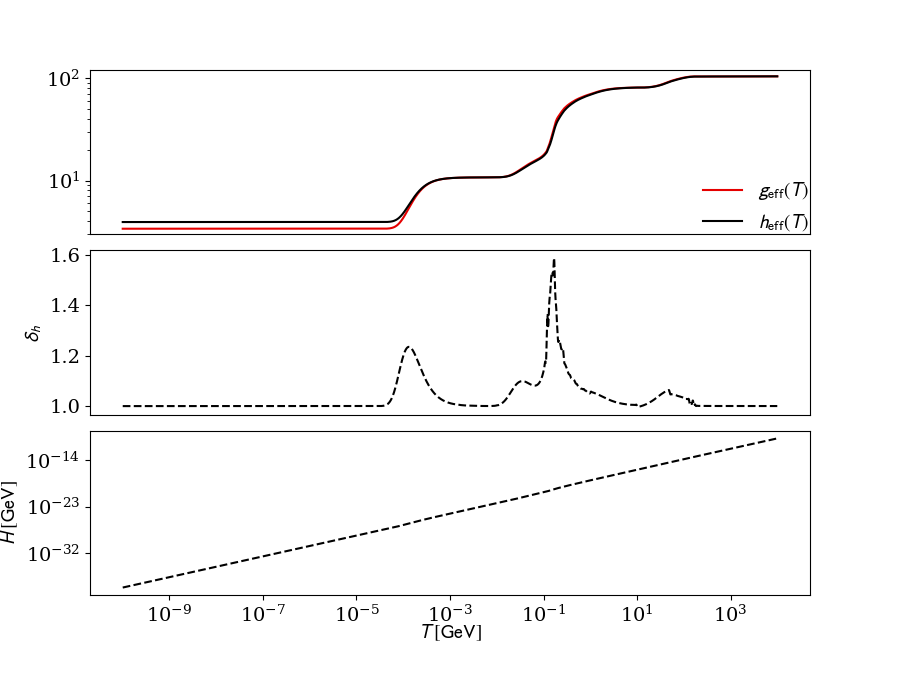

In [3]:
fig=plt.figure(figsize=(9,7))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.1)
fig.suptitle('')

sub = fig.add_subplot(3,1, 1)

T=np.logspace(-10,4,50000)
gt=[geff(i) for i in T]
ht=[heff(i) for i in T]

sub.plot(T,gt,linestyle='-',c='xkcd:red',label=r"$g_{\rm eff} (T)$")
sub.plot(T,ht,linestyle='-',c='xkcd:black',label=r"$h_{\rm eff} (T)$")


sub.legend(bbox_to_anchor=(1, 0.0),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='lower right',fontsize=14,framealpha=0)
sub.set_yscale('log')
sub.set_xscale('log')
sub.get_xaxis().set_visible(False)

sub.set_ylim(3,1.2e2)

sub = fig.add_subplot(3,1,2)

dht=[dh(i) for i in T]
sub.plot(T,dht,linestyle='--',c='xkcd:black')#,label=r"$g_{\rm eff} (T)$")
sub.set_ylabel(r'$\delta_h$')
sub.set_yscale('linear')
sub.set_xscale('log')
sub.get_xaxis().set_visible(False)

sub = fig.add_subplot(3,1,3)

H=[Hubble(i) for i in T]
sub.plot(T,H,linestyle='--',c='xkcd:black')#,label=r"$g_{\rm eff} (T)$")

sub.set_ylabel(r'$H \; [{\rm GeV}]$')
sub.set_yscale('log')
sub.set_xscale('log')
sub.set_xlabel(r'$T \; [{\rm GeV}]$')
sub.xaxis.set_label_coords(0.5, -0.17) 



fig.show()

In [4]:
#approximate number densities

def nb_app(x,m):
    if x<=3:
        return 1.20206/np.pi**2.*(m/x)**3
    else:
        return (m*m/(2*x*np.pi))**(1.5)*np.exp(-x)
    
def nf_app(x,m):
    if x<=3:
        return 3/4.*1.20206/np.pi**2.*(m/x)**3
    else:
        return (m*m/(2*x*np.pi))**(1.5)*np.exp(-x)

<IPython.core.display.Javascript object>


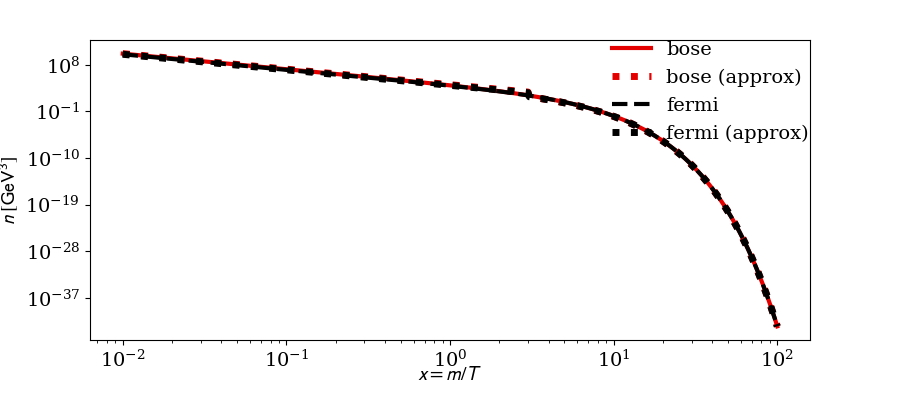

In [5]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')

sub = fig.add_subplot(1,1,1)

x=np.logspace(-2,2,500)
nb=[n_bose(i,50) for i in x]
nb_approx=[nb_app(i,50) for i in x]

nf=[n_fermi(i,50) for i in x]
nf_approx=[nf_app(i,50) for i in x]

sub.plot(x,nb,linestyle='-',c='xkcd:red',linewidth=3,label=r"bose")
sub.plot(x,nb_approx,linestyle=':',c='xkcd:red',linewidth=5,label=r"bose (approx)")
sub.plot(x,nf,linestyle='--',c='xkcd:black',linewidth=3,label=r"fermi")
sub.plot(x,nf_approx,linestyle=':',c='xkcd:black',linewidth=5,label=r"fermi (approx)")



sub.legend(bbox_to_anchor=(1, 1),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)

sub.set_xlabel(r'$x=m/T$')
sub.xaxis.set_label_coords(0.5, -0.085) 
sub.set_ylabel(r'$n  \; [{\rm GeV^3}]$')
sub.set_yscale('log')
sub.set_xscale('log')


fig.show()

In [6]:
#approximate energy densities

def rb_app(x,m):
    if x<=3:
        return np.pi**2./30.*(m/x)**4
    else:
        return m*nb_app(x,m)
    
def rf_app(x,m):
    if x<=3:
        return 7/8.*np.pi**2./30.*(m/x)**4
    else:
        return m*nf_app(x,m)

<IPython.core.display.Javascript object>


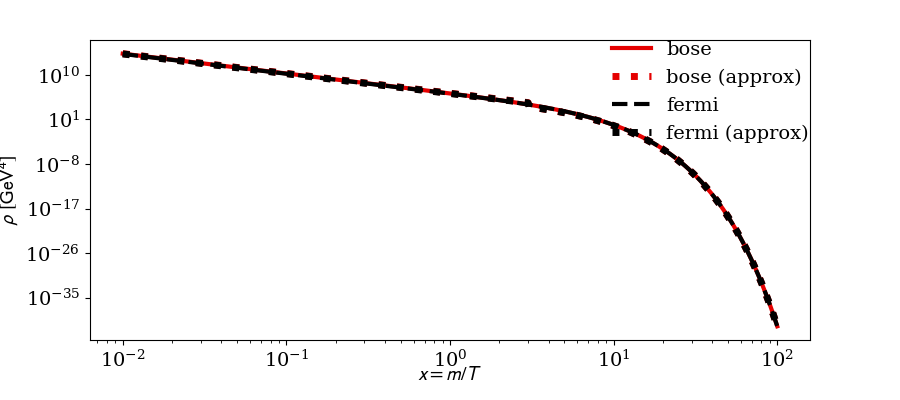

In [7]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')

sub = fig.add_subplot(1,1,1)

x=np.logspace(-2,2,500)
rb=[rho_bose(i,50) for i in x]
rb_approx=[rb_app(i,50) for i in x]

rf=[rho_fermi(i,50) for i in x]
rf_approx=[rf_app(i,50) for i in x]


sub.plot(x,rb,linestyle='-',c='xkcd:red',linewidth=3,label=r"bose")
sub.plot(x,rb_approx,linestyle=':',c='xkcd:red',linewidth=5,label=r"bose (approx)")

sub.plot(x,rf,linestyle='--',c='xkcd:black',linewidth=3,label=r"fermi")
sub.plot(x,rf_approx,linestyle=':',c='xkcd:black',linewidth=5,label=r"fermi (approx)")

sub.legend(bbox_to_anchor=(1, 1),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)

sub.set_xlabel(r'$x=m/T$')
sub.xaxis.set_label_coords(0.5, -0.085) 
sub.set_ylabel(r'$\rho  \; [{\rm GeV^4}]$')
sub.set_yscale('log')
sub.set_xscale('log')


fig.show()

In [8]:
#approximate energy densities

def n1b_app(x,m):
    if x<=3:
        return (x/1e-2)**-2.*n1_bose(1e-2,m)
    else:
        return nb_app(x,m)/m
    
def n1f_app(x,m):
    if x<=3:
        return (x/1e-2)**-2.*n1_fermi(1e-2,m)
    else:
        return nf_app(x,m)/m

<IPython.core.display.Javascript object>


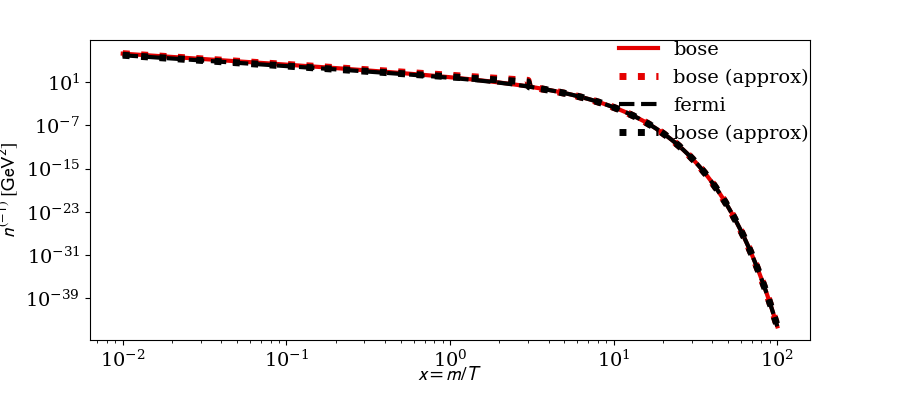

In [9]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')

sub = fig.add_subplot(1,1,1)

x=np.logspace(-2,2,500)
n1b=[n1_bose(i,50) for i in x]
n1b_approx=[n1b_app(i,50) for i in x]

n1f=[n1_fermi(i,50) for i in x]
n1f_approx=[n1f_app(i,50) for i in x]


sub.plot(x,n1b,linestyle='-',c='xkcd:red',linewidth=3,label=r"bose")
sub.plot(x,n1b_approx,linestyle=':',c='xkcd:red',linewidth=5,label=r"bose (approx)")

sub.plot(x,n1f,linestyle='--',c='xkcd:black',linewidth=3,label=r"fermi")
sub.plot(x,n1f_approx,linestyle=':',c='xkcd:black',linewidth=5,label=r"bose (approx)")


sub.legend(bbox_to_anchor=(1, 1),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)

sub.set_xlabel(r'$x=m/T$')
sub.xaxis.set_label_coords(0.5, -0.085) 
sub.set_ylabel(r'$n^{(-1)}  \; [{\rm GeV^2}]$')
sub.set_yscale('log')
sub.set_xscale('log')


fig.show()

In [10]:
#the mass scaling seems correct (the ratios should be close to 1)!

kk=[]
for i in range(10000):
    
    m=np.random.rand()*5000+1
    k=np.abs([
        n_bose(1,1)/(n_bose(1,m)/m**3) -1,
        n_fermi(1,1)/(n_fermi(1,m)/m**3)-1,

        rho_bose(1,1)/(rho_bose(1,m)/m**4)-1,
        rho_fermi(1,1)/(rho_fermi(1,m)/m**4)-1,


        n1_bose(1,1)/(n1_bose(1,m)/m**2)-1,
        n1_fermi(1,1)/(n1_fermi(1,m)/m**2)-1

    ])
    kk.append(max(k))
    
max(kk)

4.440892098500626e-16